# **Submission Klasifikasi Gambar Oleh Nurul Tazkiyah Adam**

In [176]:
# memastikan tensorflow yang digunakan versi 2 atau lebih
import tensorflow as tf
print(tf.__version__)

2.8.2


In [177]:
# mengunduh dari link ke file zip
!wget --no-check-certificate \ https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

 https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip: Scheme missing.


In [178]:
# mengekstrak file zip yang telah diunduh sebelumnya
import zipfile, os

zip_local = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(zip_local, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [179]:
# data folder gambar Gunting, Kertas, Batu
import os                                                                         
folder_gunting = os.path.join('/content/rockpaperscissors/scissors')  
print('Terdapat', len(os.listdir(folder_gunting)), 'gambar gunting pada folder scissors')            
                   
folder_kertas = os.path.join('/content/rockpaperscissors/paper')
print('Terdapat', len(os.listdir(folder_kertas)), 'gambar kertas pada folder paper')                    

folder_batu= os.path.join('/content/rockpaperscissors/rock')
print('Terdapat', len(os.listdir(folder_batu)), 'gambar batu pada folder rock')                    

Terdapat 750 gambar gunting pada folder scissors
Terdapat 712 gambar kertas pada folder paper
Terdapat 726 gambar batu pada folder rock


In [180]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

folder_bahan = '/content/rockpaperscissors/rps-cv-images/' 

IDG = ImageDataGenerator(
                    rescale = 1./255, # membagi ke ukuran pixel terkecil kemudian augmentasi
                    rotation_range = 40, 
                    horizontal_flip = True,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.1,
                    fill_mode = 'nearest', 
                    validation_split = 0.4 # pembagian dataset, 60% train set dan 40% validation set
)

In [181]:
train_generator = IDG.flow_from_directory(
        folder_bahan,  # folder bahan yang dijadikan target digenerasi
        target_size = (150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size = 10,
        class_mode = 'categorical',
        shuffle = True,
        subset = 'training' # untuk data latih
)

validation_generator = IDG.flow_from_directory(
        folder_bahan, # folder bahan yang dijadikan target digenerasi
        target_size = (150, 150), 
        batch_size = 10, 
        class_mode = 'categorical', # klasifikasi multi sehingga menggunakan class_mode = 'categorical'
        shuffle = True,
        subset = 'validation' # untuk data validasi
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [241]:
model = tf.keras.models.Sequential([ # menggunakan model sequential
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [242]:
model.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_213 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_213 (MaxPooli  (None, 74, 74, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_214 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_214 (MaxPooli  (None, 36, 36, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_215 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_215 (MaxPooli  (None, 17, 17, 128)    

In [256]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [257]:
class berhenti(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') >= 0.96):
      print('\nalhamdulillah akurasi mencapai 96%')
      self.model.stop_training = True
iniCallback = berhenti()

In [258]:
history = model.fit(
      train_generator,
      steps_per_epoch = 25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs = 25,
      validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps = 5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose = 2,
      callbacks = [iniCallback])

Epoch 1/25
25/25 - 21s - loss: 0.3117 - accuracy: 0.9160 - val_loss: 0.0628 - val_accuracy: 1.0000 - 21s/epoch - 854ms/step
Epoch 2/25
25/25 - 20s - loss: 0.2488 - accuracy: 0.9360 - val_loss: 0.0362 - val_accuracy: 0.9800 - 20s/epoch - 798ms/step
Epoch 3/25
25/25 - 20s - loss: 0.2806 - accuracy: 0.9360 - val_loss: 0.3763 - val_accuracy: 0.8600 - 20s/epoch - 797ms/step
Epoch 4/25
25/25 - 20s - loss: 0.2672 - accuracy: 0.9320 - val_loss: 0.3709 - val_accuracy: 0.9000 - 20s/epoch - 799ms/step
Epoch 5/25
25/25 - 20s - loss: 0.1842 - accuracy: 0.9480 - val_loss: 0.2123 - val_accuracy: 0.9200 - 20s/epoch - 800ms/step
Epoch 6/25
25/25 - 20s - loss: 0.2165 - accuracy: 0.9262 - val_loss: 0.0951 - val_accuracy: 0.9400 - 20s/epoch - 788ms/step
Epoch 7/25
25/25 - 20s - loss: 0.2103 - accuracy: 0.9360 - val_loss: 0.1569 - val_accuracy: 0.9600 - 20s/epoch - 797ms/step
Epoch 8/25
25/25 - 20s - loss: 0.3450 - accuracy: 0.8720 - val_loss: 0.0936 - val_accuracy: 0.9600 - 20s/epoch - 799ms/step
Epoch 9/

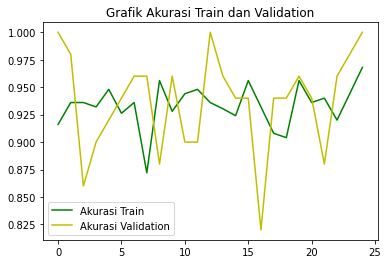

<Figure size 432x288 with 0 Axes>

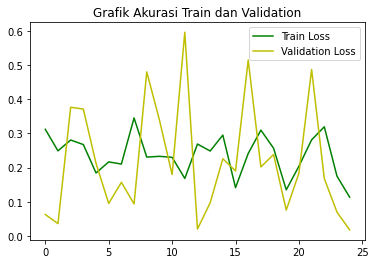

<Figure size 432x288 with 0 Axes>

In [259]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
acc_train = history.history['accuracy']
loss_val = history.history['val_loss']
acc_val = history.history['val_accuracy']

epochs = range(len(acc_train))

plt.plot(epochs, acc_train, 'g', label='Akurasi Train')
plt.plot(epochs, acc_val, 'y', label='Akurasi Validation')
plt.title('Grafik Akurasi Train dan Validation')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss_train, 'g', label='Train Loss')
plt.plot(epochs, loss_val, 'y', label='Validation Loss')
plt.title('Grafik Akurasi Train dan Validation')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving 0eqArS2GgsBeqgSn.png to 0eqArS2GgsBeqgSn (1).png
0eqArS2GgsBeqgSn.png
Ini Termasuk Gambar Tangan Berbentuk KERTAS


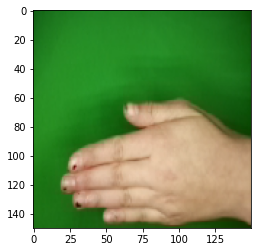

In [264]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # mempredeksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes[0][0]==1: # untuk gambar kertas
    print('Ini Termasuk Gambar Tangan Berbentuk KERTAS') 
  elif classes[0][1]==1: # untuk gambar batu
    print('Ini Termasuk Gambar Tangan Berbentuk BATU')                                   
  elif classes[0][2]==1: # untuk gambar gunting
    print('Ini Termasuk Gambar Tangan Berbentuk GUNTING')                                
  else:
    print('Mohon maaf belum bisa dideteksi')    

Referensi 

---


[1] [Modul Belajar Machine Learning Untuk Pemula, Latihan Membuat Model Klasifikasi Gambar, Dicoding](https://colab.research.google.com/drive/1gUcRA2xYhSLeiSXNtqcWubnLh6x_HodN?usp=sharing)

---


[2] [Klasifikasi gambar Gunting Batu Kertas dengan CNN, Joko Eliyanto](https://youtu.be/nzlv4S7L4nw)

---


[3] [Klasifikasi Gambar Menggunakan CNN, Dimas Adriansyah](https://youtu.be/Atn9AmobgZw)